# Task 6.6. Sourcing and Analyzing Time series Data

**01. Importing libraries**

**02. Importing the data**

**03. Data preprocessing**

**04. Finding the elbow**

**05. K-means clustering**

## 01. Importing the libraries

In [1]:
#importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") # Disable deprecation warnings 
plt.style.use('fivethirtyeight') # styling for matplotlib

## 02. Importing the data 

In [2]:
# configuring the API key
quandl.ApiConfig.api_key = 'AgsbDy1xS5DkrCoSxSpq'

In [3]:
# importing the GDP per capita data of Spain
data_esp = quandl.get('ODA/ESP_NGDPRPC')

In [4]:
#importing the GDP per capita data of Switzerland
data_che = quandl.get('ODA/CHE_NGDPRPC')

**I selected the GDP per capita of two countries included in my Airbnb study (Spain and Switzerland) as I'm interested in seeing how the wealth of a country impacts the Airbnb prices**

## 03. Data cleaning

In [5]:
data_esp.head()

,Value
Date,
1980-12-31,12943.69
1981-12-31,12769.64
1982-12-31,12858.98
1983-12-31,13010.43
1984-12-31,13178.81


In [6]:
# checking duplicates for the Spanish data
dups = data_esp.duplicated()
dups.sum()

0

In [7]:
# checking null values for the Spanish data
data_esp.isnull().sum()

Value    0
dtype: int64

In [8]:
# Checking for 
dups = data_che.duplicated()
dups.sum()

0

Text(0.5, 1.0, 'GDP per capita in Spain')

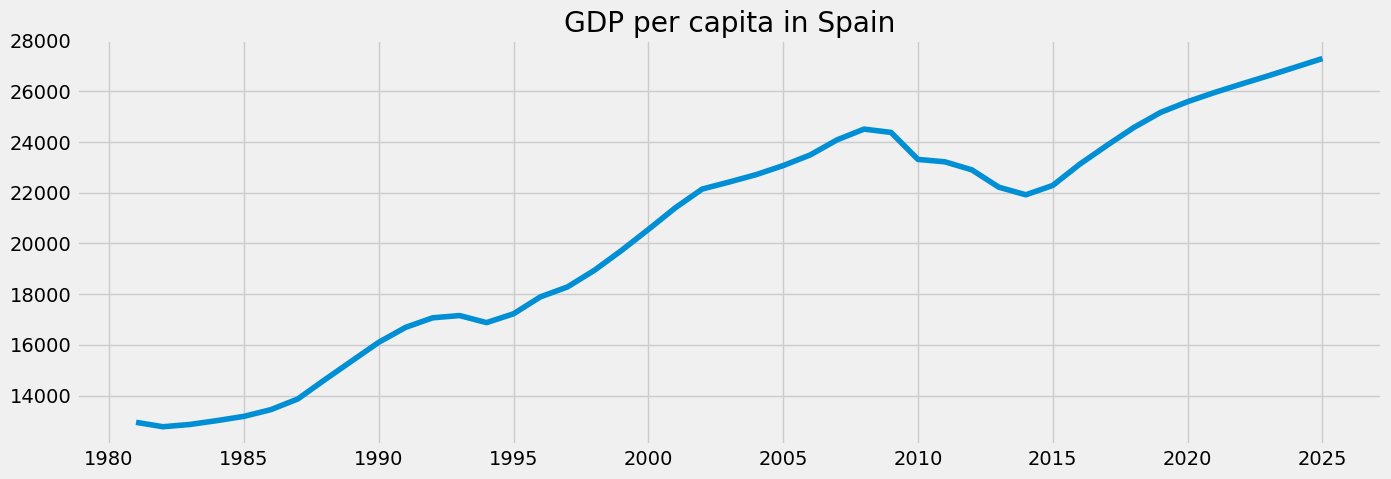

In [9]:
#line chart with the data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_esp)
plt.title("GDP per capita in Spain")

Text(0.5, 1.0, 'GDP per capita in Switzerland')

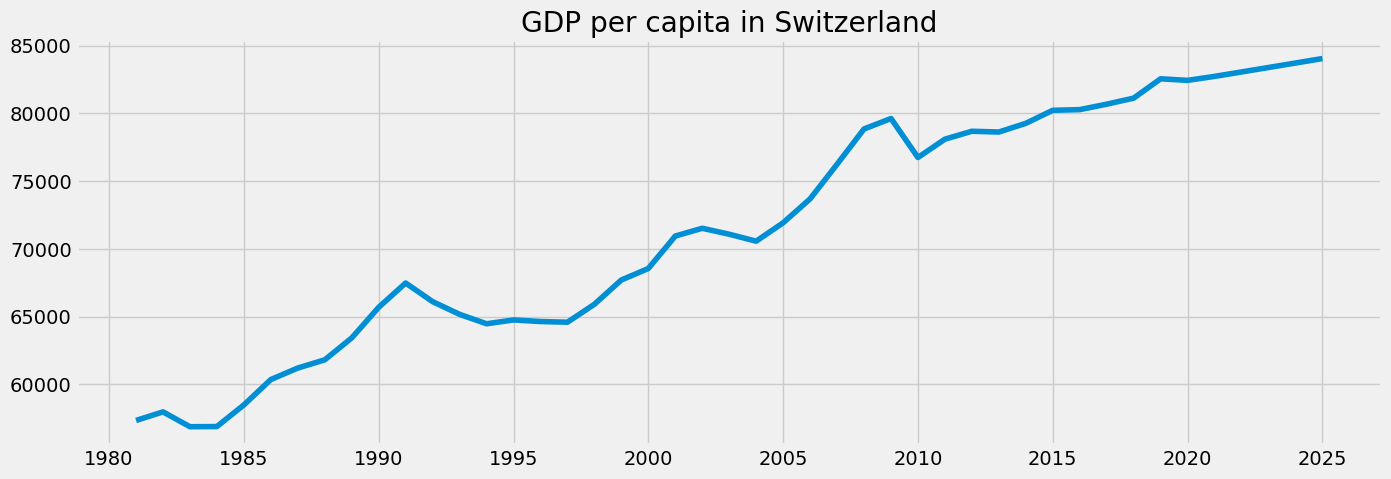

In [10]:
#line chart with the data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_che)
plt.title("GDP per capita in Switzerland")

## Decomposition and Dickey-Fuller test

In [11]:
# Decompose the time series using an additive model

decomposition_esp = sm.tsa.seasonal_decompose(data_esp, model='additive')

In [12]:
# Decompose the time series using an additive model

decomposition_che = sm.tsa.seasonal_decompose(data_che, model='additive')

In [13]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

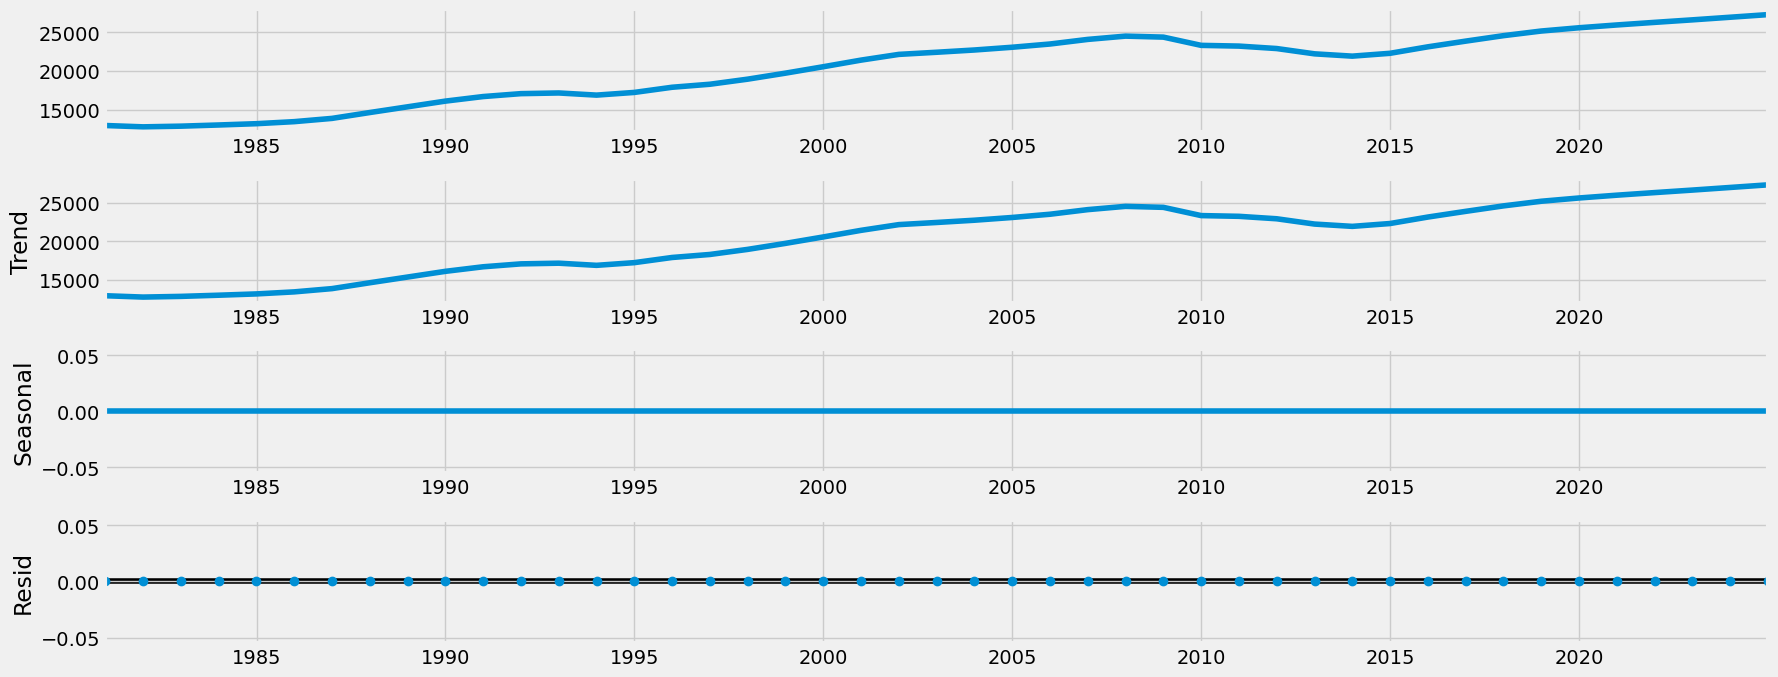

In [14]:
# Plot the separate components

decomposition_esp.plot()
plt.show()

In [15]:

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_esp['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.309820
p-value                         0.624668
Number of Lags Used             1.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


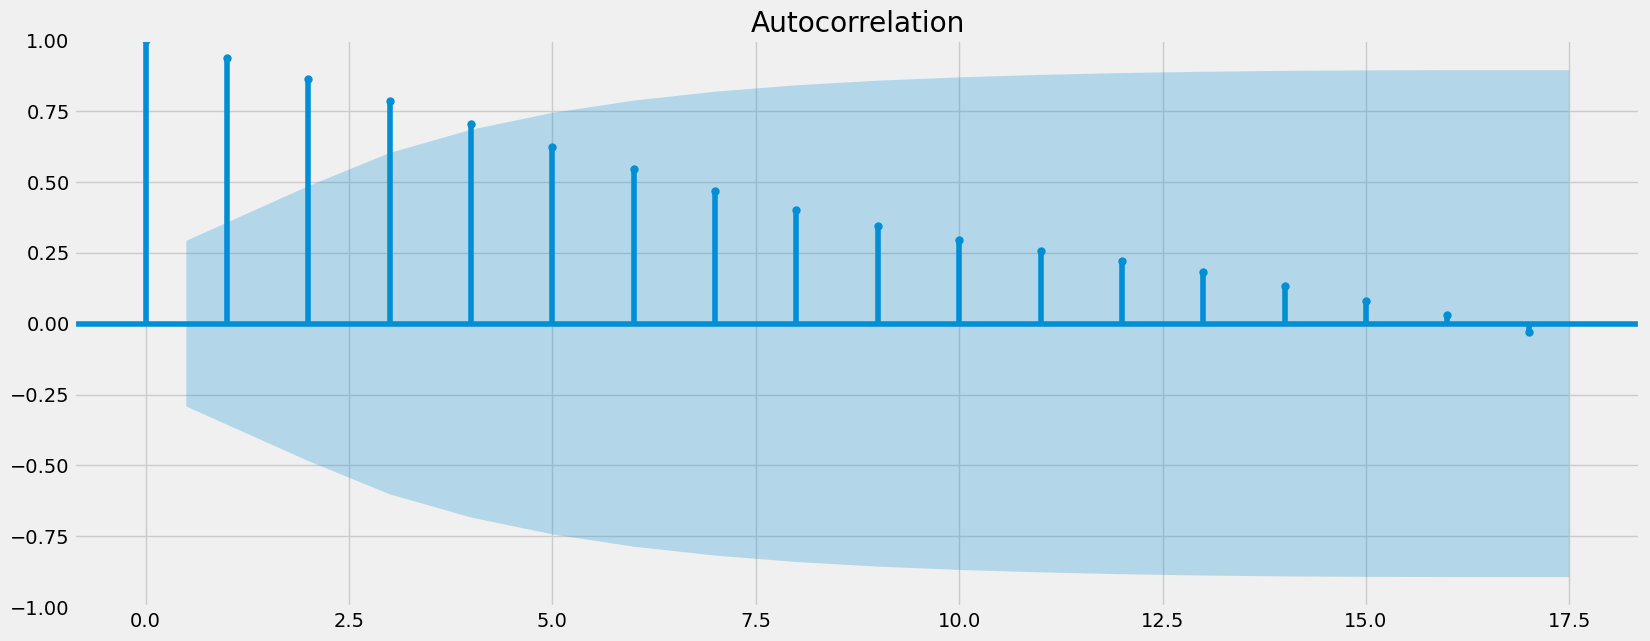

In [16]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_esp)
plt.show()

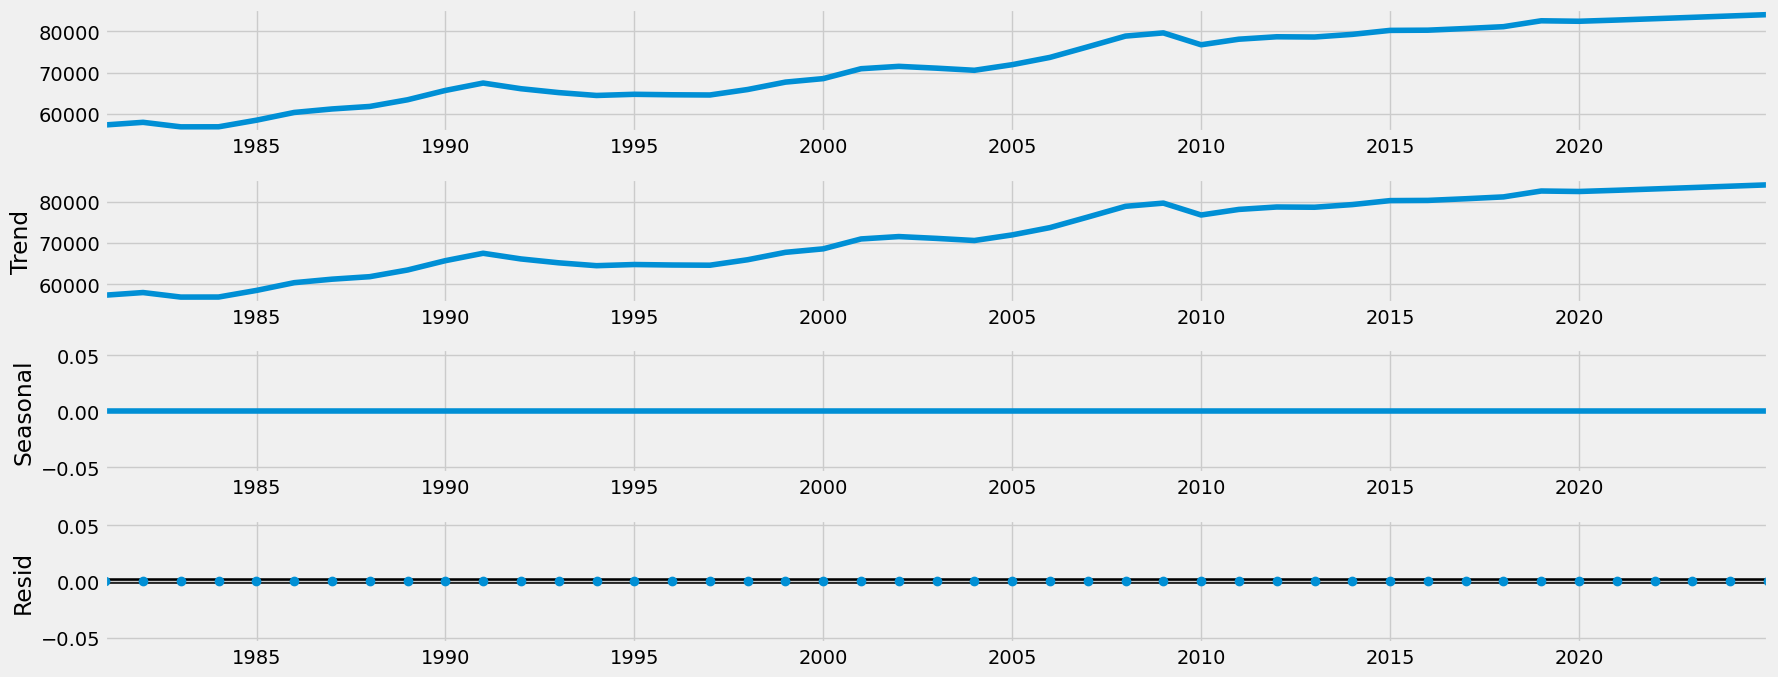

In [17]:
# decomposition swiss data
decomposition_che.plot()
plt.show()

In [18]:

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_che['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.785049
p-value                         0.823474
Number of Lags Used             0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [19]:
data_esp_diff = data_esp - data_esp.shift(1)

In [20]:
data_esp_diff.dropna(inplace = True)

In [21]:
data_che_dif = data_che - data_che.shift(1)

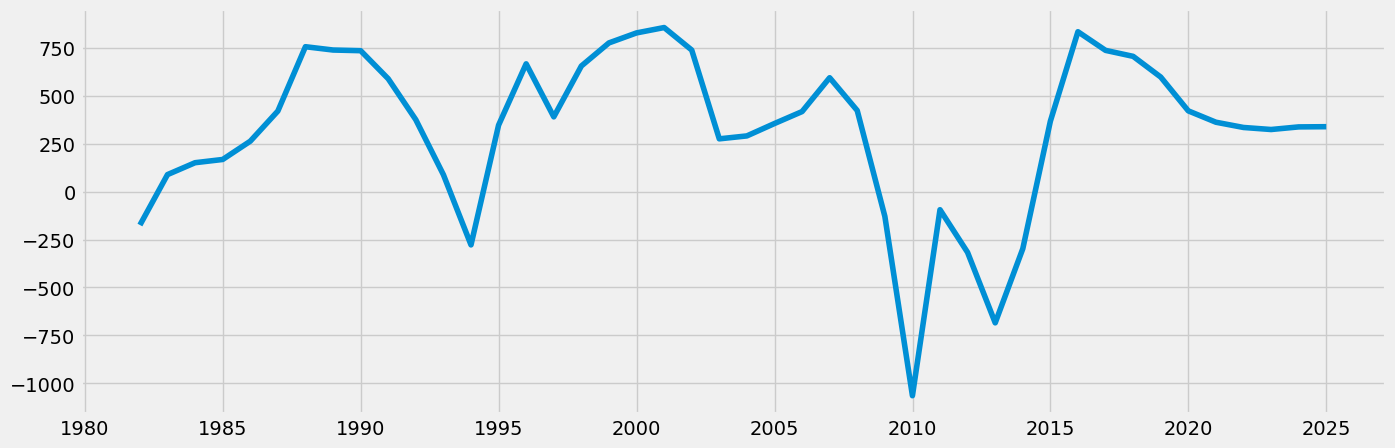

In [22]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_esp_diff)

In [23]:

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_esp_diff['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.934366
p-value                         0.041495
Number of Lags Used             0.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


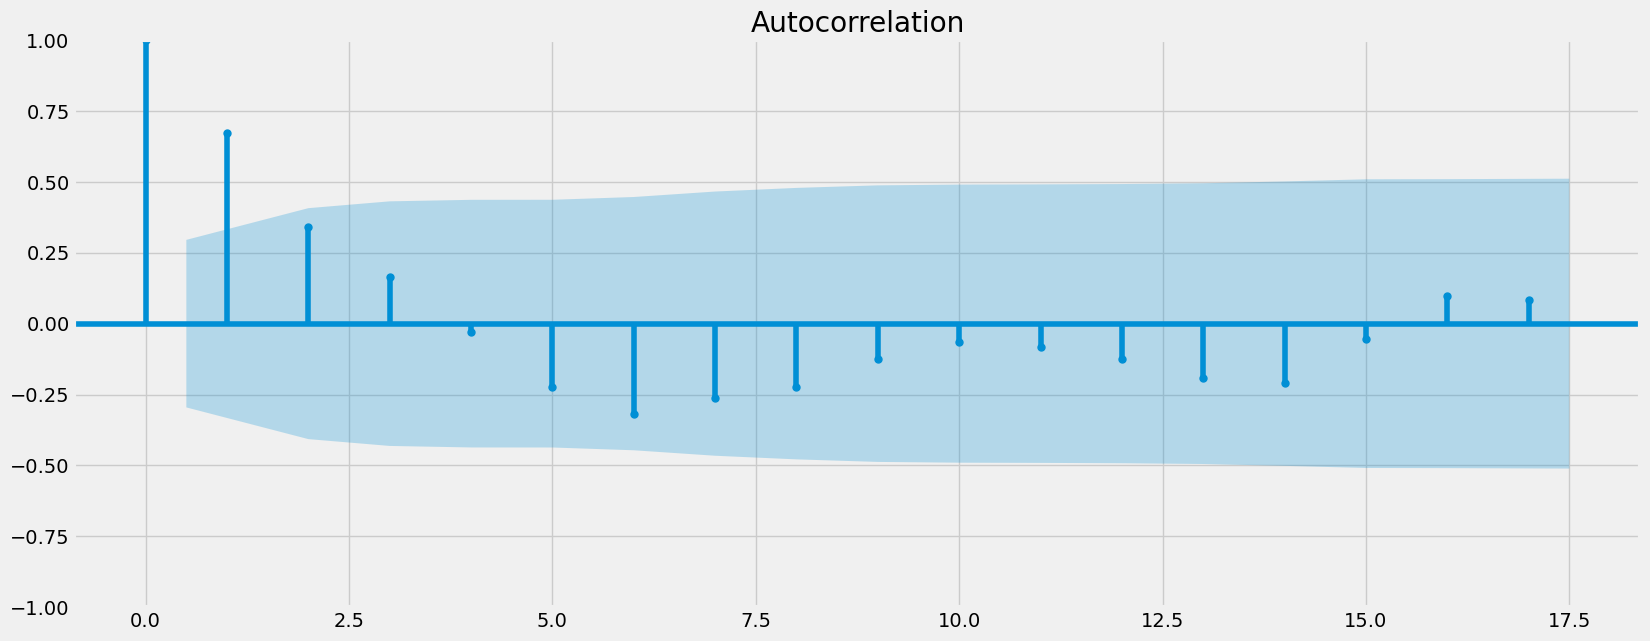

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_esp_diff)
plt.show()

In [25]:
data_esp.head()

,Value
Date,
1980-12-31,12943.69
1981-12-31,12769.64
1982-12-31,12858.98
1983-12-31,13010.43
1984-12-31,13178.81
